In [2]:
#Imports e configurações visuais

# Bibliotecas principais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")


In [3]:
#Carregamento otimizado do dataset

# Carrega apenas as primeiras 500 linhas para explorar sem travar
df = pd.read_csv("../data/NASA_Exoplanet_Composite.csv", nrows=500)

# Verifica estrutura básica
print("Formato:", df.shape)
print("Colunas:", df.columns.tolist()[:15])  # mostra só as primeiras 15 colunas


Formato: (500, 313)
Colunas: ['rowid', 'pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname']


In [4]:
#Informações iniciais

# Informações gerais
df.info()

# Estatísticas apenas para colunas numéricas
df.select_dtypes(include='number').describe().T.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 313 entries, rowid to pl_ntranspec
dtypes: float64(208), int64(27), object(78)
memory usage: 1.2+ MB


,count,mean,std,min,25%,50%,75%,max
rowid,500.0,250.500,144.481833,1.0,125.75,250.5,375.25,500.0
sy_snum,500.0,1.184,0.458874,1.0,1.00,1.0,1.00,4.0
sy_pnum,500.0,1.630,1.080479,1.0,1.00,1.0,2.00,6.0
sy_mnum,500.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
cb_flag,500.0,0.008,0.089173,0.0,0.00,0.0,0.00,1.0
disc_year,500.0,2014.666,5.596166,1995.0,2010.00,2016.0,2019.00,2023.0
rv_flag,500.0,0.856,0.351441,0.0,1.00,1.0,1.00,1.0
pul_flag,500.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
ptv_flag,500.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
tran_flag,500.0,0.494,0.500465,0.0,0.00,0.0,1.00,1.0


In [5]:
#Padronização de colunas

# Padroniza nomes de colunas para facilitar manipulação
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('[^0-9a-zA-Z_]', '', regex=True)
)


In [6]:
# Verifica os campos com mais valores nulos
df.isna().mean().sort_values(ascending=False).head(15)


sy_kepmagerr2           1.000
sy_kepmagerr1           1.000
sy_icmagerr2            1.000
pl_occdeperr1           0.994
pl_occdeperr2           0.994
pl_occdeplim            0.992
pl_occdep_reflink       0.992
pl_occdep               0.992
pl_trueobliqerr1        0.986
pl_trueobliqerr2        0.986
pl_trueobliq            0.982
pl_trueobliqlim         0.982
pl_trueobliq_reflink    0.982
pl_projobliqerr2        0.912
pl_projobliq            0.912
dtype: float64

In [7]:
# Cria uma amostra aleatória para visualizações
amostra = df.sample(n=300, random_state=42)
amostra.head()


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbper_reflink,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_orbsmax_reflink,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_rade_reflink,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,...,sy_rmag,sy_rmagerr1,sy_rmagerr2,sy_rmag_reflink,sy_imag,sy_imagerr1,sy_imagerr2,sy_imag_reflink,sy_zmag,sy_zmagerr1,sy_zmagerr2,sy_zmag_reflink,sy_w1mag,sy_w1magerr1,sy_w1magerr2,sy_w1mag_reflink,sy_w2mag,sy_w2magerr1,sy_w2magerr2,sy_w2mag_reflink,sy_w3mag,sy_w3magerr1,sy_w3magerr2,sy_w3mag_reflink,sy_w4mag,sy_w4magerr1,sy_w4magerr2,sy_w4mag_reflink,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,sy_gaiamag_reflink,sy_icmag,sy_icmagerr1,sy_icmagerr2,sy_icmag_reflink,sy_tmag,sy_tmagerr1,sy_tmagerr2,sy_tmag_reflink,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,sy_kepmag_reflink,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
361,362,HAT-P-54 b,HAT-P-54,b,NaN,NaN,TIC 284326455,Gaia DR2 3383298227579280640,1,1,0,0,Transit,2015,<a refstr=BAKOS_ET_AL__2015 href=https://ui.ad...,2015-04,Ground,HATNet,Canon 200mm f/1.8L,2K CCD Sensor,1,0,0,1,0,0,0,0,0,0,0,3.799847,0.000014,-0.000014,0.0,<a refstr=BAKOS_ET_AL__2015 href=https://ui.ad...,0.04117,0.00043,-0.00043,0.0,<a refstr=BAKOS_ET_AL__2015 href=https://ui.ad...,10.581,0.314,-0.314,0,<a refstr=BAKOS_ET_AL__2015 href=https://ui.ad...,0.944,0.028,-0.028,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,10.282,0.024,-0.024,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,10.342,0.021,-0.021,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,10.195,0.088,-0.088,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,8.677,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,13.01720,0.001035,-0.001035,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12.2341,0.0063,-0.0063,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,13.600,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,0,0,0,0,0
73,74,BD-210397 b,BD-210397,b,NaN,HIP 10337,TIC 268804174,Gaia DR2 5124636303346779008,1,2,0,0,Radial Velocity,2023,<a refstr=FRENSCH_ET_AL__2023 href=https://ui....,2023-06,Ground,La Silla Observatory,3.6 m ESO Telescope,HARPS Spectrograph,1,0,0,0,0,0,0,0,0,0,0,1891.000000,56.000000,-48.000000,0.0,<a refstr=FRENSCH_ET_AL__2023 href=https://ui....,2.63000,0.06000,-0.05000,0.0,<a refstr=FRENSCH_ET_AL__2023 href=https://ui....,14.000,NaN,NaN,0,<a refstr=CALCULATED_VALUE href=/docs/composit...,1.250,NaN,NaN,0,...,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,9.25962,0.000826,-0.000826,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,8.4502,0.0061,-0.0061,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,0.0,1,0,1,0,0
374,375,HAT-P-66 b,HAT-P-66,b,NaN,NaN,TIC 137881699,Gaia DR2 852608874351434752,1,1,0,0,Transit,2016,<a refstr=HARTMAN_ET_AL__2016 href=https://ui....,2016-12,Ground,HATNet,Canon 200mm f/1.8L,2K CCD Sensor,1,0,0,1,0,0,0,0,0,0,0,2.972086,0.000006,-0.000006,0.0,<a refstr=HARTMAN_ET_AL__2016 href=https://ui....,0.04363,0.00121,-0.000

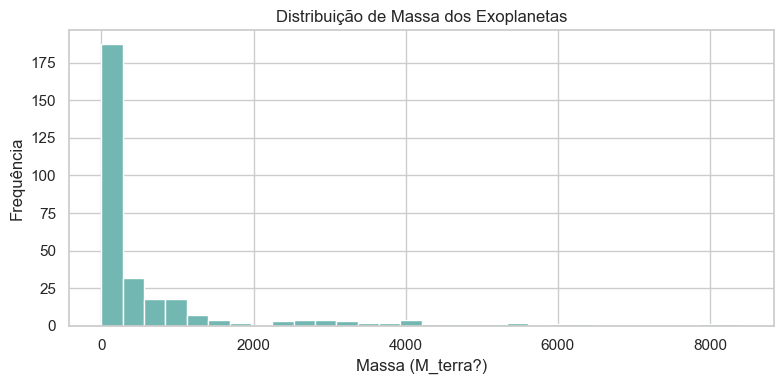

In [8]:
#Visualizações iniciais

# Exemplo: distribuição de massa (se existir)
if 'pl_bmasse' in amostra.columns:
    amostra['pl_bmasse'].plot(kind='hist', bins=30, color='#72B7B2', figsize=(8,4))
    plt.title('Distribuição de Massa dos Exoplanetas')
    plt.xlabel('Massa (M_terra?)')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()


In [9]:
#Exportar amostra limpa para Power BI

# Salva a amostra como CSV para uso no Power BI
import os
os.makedirs("../data/tmp", exist_ok=True)
amostra.to_csv("../data/tmp/exoplanetas_amostra.csv", index=False)
